In [177]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import plotly.graph_objs as go

In [4]:
coeresults = pd.read_csv('CV03 G2 Mini Proj - M11-coe_results.csv')
coeresults.head(5)

,month,vehicle_class,Premium Average,quota_monthly,bids_sucess_monthly,bids_received_monthly,Petrol (95 Octane)/litre ($),Diesel/litre ($),taxi_fleet_total,CatA_Quota,SBS Ridership,CPIndex,SORA (IR),pqp,COE Revalidation
0,2013-01,Category A,91555.0,819.0,818.0,1044.0,2.02,1.50,28297.0,NaN,NaN,98.121,0.0715,75818,NaN
1,2013-02,Category A,82705.0,668.0,662.0,845.0,2.11,1.57,28245.0,NaN,NaN,99.107,0.0657,83003,NaN
2,2013-03,Category A,69449.0,673.0,666.0,2103.0,2.07,1.55,28075.0,NaN,NaN,98.574,0.0334,84822,NaN
3,2013-04,Category A,61763.0,674.0,672.0,1959.0,2.00,1.48,27911.0,NaN,NaN,97.112,0.1010,81237,NaN
4,2013-05,Category A,63919.0,669.0,653.0,1800.0,1.96,1.43,27719.0,NaN,NaN,97.457,0.0537,71306,NaN


In [5]:
coeresults.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   month                         129 non-null    object 
 1   vehicle_class                 126 non-null    object 
 2   Premium Average               126 non-null    float64
 3   quota_monthly                 126 non-null    float64
 4   bids_sucess_monthly           126 non-null    float64
 5   bids_received_monthly         126 non-null    float64
 6   Petrol (95 Octane)/litre ($)  120 non-null    float64
 7   Diesel/litre ($)              120 non-null    float64
 8   taxi_fleet_total              120 non-null    float64
 9   CatA_Quota                    117 non-null    float64
 10  SBS Ridership                 117 non-null    object 
 11  CPIndex                       128 non-null    float64
 12  SORA (IR)                     129 non-null    float64
 13  pqp  

In [66]:
def compcol(col_name): #extract month, coe, and 1 named column for comparison
    global compdf
    compdf = coeresults[['month','Premium Average',col_name]]
    dellist = []
    for dindex in compdf.index.tolist():
        checkval1 = compdf.iloc[dindex].loc[col_name]
        checkval_dict1 = {checkval1}
        checkval_df1 = pd.DataFrame(checkval_dict1)
        nullyn1 = checkval_df1.isnull()
        if nullyn1.iloc[0].loc[0] == True  : 
            dellist.append(dindex)
    compdf = compdf.drop(labels=dellist, axis=0) #deletes rows where named column has null value.TO DO: for Prem Avg column also
    coehigh_list = []
    for dindex in compdf.index.tolist():
        coeval = compdf.iloc[dindex].loc['Premium Average']
        coehigh = coeval > 50000.0 #true if coe is higher than 2022-12
        coehigh_list.append(coehigh)
    compdf['coe_high'] = coehigh_list #adds column where True if coe is greater than 50 000
    return(compdf)

    
compcol('Petrol (95 Octane)/litre ($)')

NameError: name 'model' is not defined

C:\Users\iamsn\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


coe_high
False    61
True     59
Name: count, dtype: int64

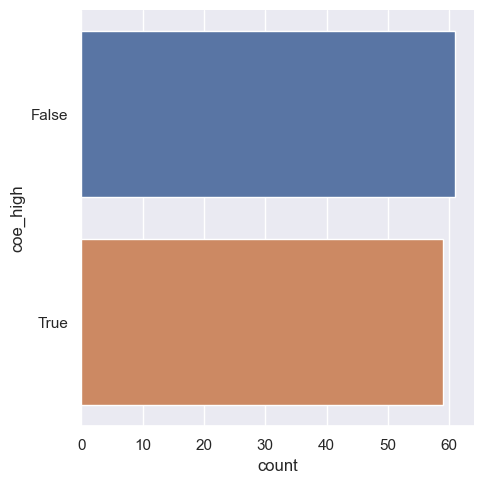

In [62]:
sb.catplot(y = 'coe_high', data = compdf, kind = "count")
compdf["coe_high"].value_counts() #coeresults.query("month=='2013-03'")["Premium Average"]

In [167]:
compcol = compdf['Petrol (95 Octane)/litre ($)']
coehigh = compdf['coe_high']
X_train, X_test, y_train, y_test = train_test_split(compcol, coehigh, test_size=0.25, random_state=16)

X_train1d = X_train.values.ravel()
y_train1d = y_train.values.ravel()
X_test1d = X_test.values.ravel()
y_test1d = y_test.values.ravel()


X_train2d = np.array(X_train1d).reshape(-1,1)
y_train2d = np.array(y_train1d).reshape(-1,1)
X_test2d = np.array(X_test1d).reshape(-1,1)
y_test2d = np.array(y_test1d).reshape(-1,1)

print(X_train2d.shape)
print(X_test2d.shape)

(90, 1)
(30, 1)


In [172]:
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train2d, y_train2d)
y_pred = logreg.predict(X_test2d)
print(y_pred)

[False  True  True False  True  True False False False False False  True
  True False False  True False False False False  True False False False
 False  True  True  True  True False]


C:\Users\iamsn\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


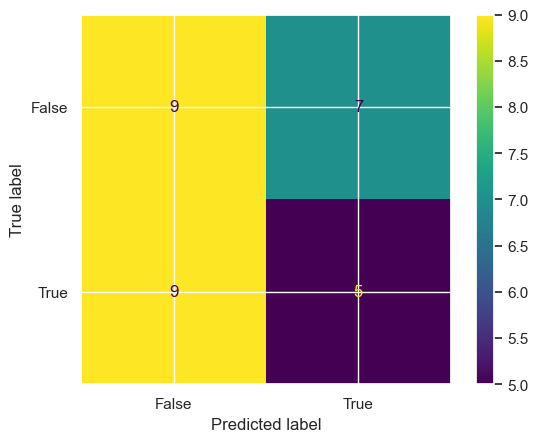

In [175]:
confusion_matrix = metrics.confusion_matrix(y_test2d, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [180]:
heatmap = go.Heatmap(z=confusion_matrix, x=['0', '1'], y=['0', '1'], colorscale='Blues')

# create the layout
layout = go.Layout(title='Confusion Matrix')

# create the figure
fig = go.Figure(data=[heatmap], layout=layout)

# show the figure
fig.show()